In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

from utils import NMF

In [2]:
n = 100 # n samples
m = 25 # m features
r = 20

np.random.seed(0)
X = np.abs(np.random.randn(n,m))

# Apply NMF
model = NMF(n_components=r, max_iter=1000, random_state=42, verbose=True)
W = model.fit_transform(X)
H = model.H

# Check reconstruction
X_reconstructed = model.inverse_transform() # W @ H
error = np.linalg.norm(X - X_reconstructed, 'fro')
print(f"\nFinal reconstruction error: {error:.4f}")

Iteration 100/1000, error: 12.5224
Iteration 200/1000, error: 11.3207
Iteration 300/1000, error: 10.8217
Iteration 400/1000, error: 10.6357
Iteration 500/1000, error: 10.5151
Iteration 600/1000, error: 10.4651
Iteration 700/1000, error: 10.4085
Iteration 800/1000, error: 10.3658
Iteration 900/1000, error: 10.3354
Iteration 1000/1000, error: 10.3200

Final reconstruction error: 10.3200


## NMS for Facial Feature Extraction

In [3]:
# Load LFW dataset
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = faces.data  # shape (n_samples, n_features)
images = faces.images  # shape (n_samples, height, width)
h, w = faces.images.shape[1:]

print(f"Dataset shape: (n,m)={X.shape}")
print(f"Images shape: (h,w)=({h},{w})")

Dataset shape: (n,m)=(1288, 1850)
Images shape: (h,w)=(50,37)


In [ ]:
faces.images[1]

array([[0.14771242, 0.19738562, 0.1751634 , ..., 0.24183007, 0.2       ,
        0.14509805],
       [0.18039216, 0.24836601, 0.24575163, ..., 0.21437909, 0.21960784,
        0.1751634 ],
       [0.21045752, 0.303268  , 0.33594772, ..., 0.2653595 , 0.18431373,
        0.16993465],
       ...,
       [0.2875817 , 0.29803923, 0.29673204, ..., 0.503268  , 0.46797386,
        0.4535948 ],
       [0.29411766, 0.29803923, 0.303268  , ..., 0.4928105 , 0.4496732 ,
        0.45359477],
       [0.30457518, 0.29673204, 0.29673204, ..., 0.45751634, 0.44444445,
        0.53594774]], dtype=float32)

In [4]:
r = 49

model = NMF(n_components=r, max_iter=1000, random_state=42, verbose=True)
W = model.fit_transform(X)
H = model.H

# Check reconstruction
X_reconstructed = model.inverse_transform() # W @ H
error = np.linalg.norm(X - X_reconstructed, 'fro')
print(f"\nFinal reconstruction error: {error:.4f}")

Iteration 100/1000, error: 135.1704
Iteration 200/1000, error: 113.4746
Iteration 300/1000, error: 106.5796
Iteration 400/1000, error: 103.6216
Iteration 500/1000, error: 102.0589
Iteration 600/1000, error: 101.0915
Iteration 700/1000, error: 100.4215
Iteration 800/1000, error: 99.9133
Iteration 900/1000, error: 99.5103
Iteration 1000/1000, error: 99.1829

Final reconstruction error: 99.1829


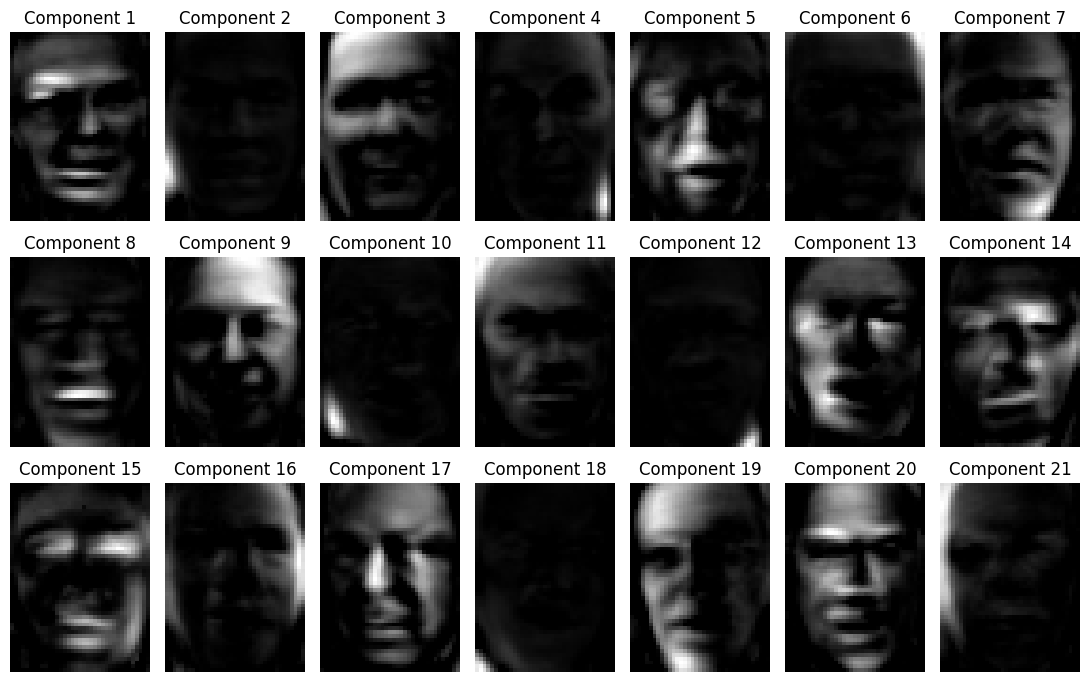

In [5]:
def plot_components(H, h, w, n_components=21):
    fig, axes = plt.subplots(3, 7, figsize=(11, 7))
    for i, ax in enumerate(axes.flat):
        ax.imshow(H[i].reshape((h, w)), cmap='gray')
        ax.set_title(f'Component {i+1}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_components(H, h, w, n_components=r)

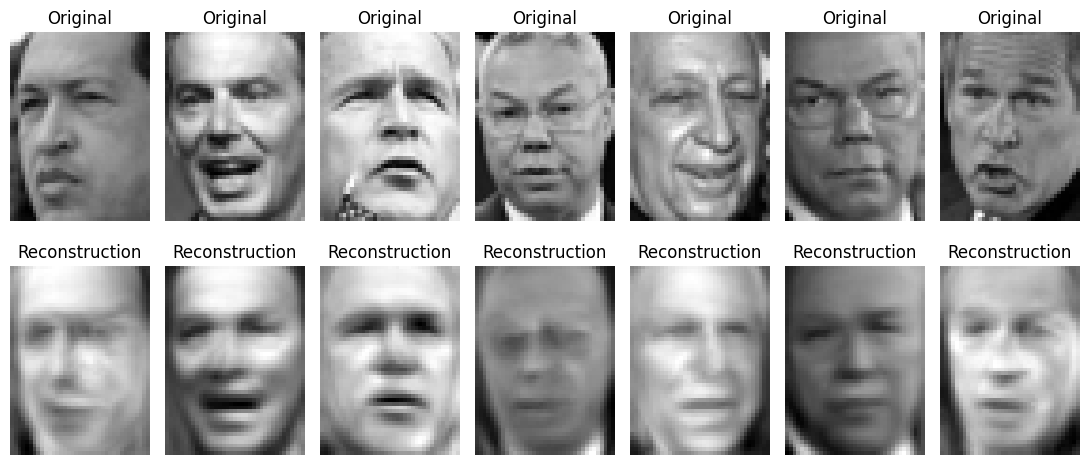

In [6]:
def show_reconstructions(W, H, original_images, h, w, n=7):
    recon = np.dot(W, H).reshape(-1, h, w)
    fig, axes = plt.subplots(2, n, figsize=(11, 5))
    for i in range(n):
        axes[0, i].imshow(original_images[i], cmap='gray')
        axes[0, i].set_title("Original")
        axes[1, i].imshow(recon[i], cmap='gray')
        axes[1, i].set_title("Reconstruction")
        for j in range(2):
            axes[j, i].axis('off')
    plt.tight_layout()
    plt.show()

show_reconstructions(W, H, images, h, w, n=7)